In [1]:
from __future__ import annotations
%matplotlib notebook
import json
import pickle
import matplotlib as mpl
mpl.use('TkAgg')  # NoQa  
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pathlib import Path
import os
from srim import Ion, Layer, Target  # , output
from srim.srim import TRIM
from srim.output import Results

#from concurrent.futures import as_completed, ProcessPoolExecutor
#import multiprocessing as mp
#from time import sleep
#from dataclasses import asdict  # , dataclass as dc
from typing import cast, Iterable, Sequence, Set, Union, List, Tuple, Dict, NamedTuple
from typing_extensions import Literal, TypedDict

from mytypes import floatArray, precisionLitType
# from dcf import SrimData

from dcfclass import SrimResults, MultiSrimResults
from ceria import ceria_2um_on_silica

C:\Users\UTGARD2\AppData\Local\pypoetry\Cache\virtualenvs\dmlsrim-7DeZLsbd-py3.7\lib\site-packages\srim\core\elementdb.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(dbpath, "r"))


Open TRIM data parent folder.
Define target.


In [2]:
results_parent = Path(R"..\data") / "ceria_2um_on_silica_10um"
print(f"Parent data directory: {results_parent.resolve()} \n")

targ = ceria_2um_on_silica
srim_dirs = [e for e in results_parent.iterdir() if e.is_dir()]

savepath=Path(R".\output")


Parent data directory: C:\dev\dmlsrim\data\ceria_2um_on_silica_10um 



Create list of SrimResults for entire depth
Save datafiles(*.csv) and damage vs depth profiles graphs for each ion energy.
Create list of stats.

In [3]:
srim_res_all = sorted([SrimResults(sd, target=targ, savepath=savepath) for sd in srim_dirs])

stats_list_all = []
for res in srim_res_all:
    res.savepath = savepath
    # dd_array = res.trunc_depth_damage_array()
    # d_array = res.get_damage_array()
    dd_table = res.make_depth_damage_csv(savepath)
    stats=res.get_damage_stats()
    stats_list_all.append(stats)
    # dam_tot_fig = res.plot_damage_depth()
    res.plot_srim(depth_marker=2000, total=True, per_ion=True)
    # plt.show()

output\He@100.0_damagevsdepth_total.png
output\He@100.0_damagevsdepth_per_ion.png
output\He@200.0_damagevsdepth_total.png
output\He@200.0_damagevsdepth_per_ion.png
output\He@300.0_damagevsdepth_total.png
output\He@300.0_damagevsdepth_per_ion.png
output\He@400.0_damagevsdepth_total.png
output\He@400.0_damagevsdepth_per_ion.png
output\He@500.0_damagevsdepth_total.png
output\He@500.0_damagevsdepth_per_ion.png
output\He@600.0_damagevsdepth_total.png
output\He@600.0_damagevsdepth_per_ion.png
output\He@700.0_damagevsdepth_total.png
output\He@700.0_damagevsdepth_per_ion.png
output\He@800.0_damagevsdepth_total.png
output\He@800.0_damagevsdepth_per_ion.png
output\He@900.0_damagevsdepth_total.png
output\He@900.0_damagevsdepth_per_ion.png
output\He@1000.0_damagevsdepth_total.png
output\He@1000.0_damagevsdepth_per_ion.png
output\He@1250.0_damagevsdepth_total.png
output\He@1250.0_damagevsdepth_per_ion.png
output\He@1500.0_damagevsdepth_total.png
output\He@1500.0_damagevsdepth_per_ion.png
output\He@

Create list of SrimResults for entire depth
Save datafiles(*.csv) and damage vs depth profiles graphs for each ion energy.
Create list of stats.

In [4]:
srim_res_2um = sorted([SrimResults(sd, target=targ, savepath=savepath, depth = 2000) for sd in srim_dirs])

for res in srim_res_2um:
    res.plot_srim(total=True, per_ion=True)


output\He@100.0_damagevsdepth_total_to_2000nm.png
output\He@100.0_damagevsdepth_per_ion_to_2000nm.png
output\He@200.0_damagevsdepth_total_to_2000nm.png
output\He@200.0_damagevsdepth_per_ion_to_2000nm.png
output\He@300.0_damagevsdepth_total_to_2000nm.png
output\He@300.0_damagevsdepth_per_ion_to_2000nm.png
output\He@400.0_damagevsdepth_total_to_2000nm.png
output\He@400.0_damagevsdepth_per_ion_to_2000nm.png
output\He@500.0_damagevsdepth_total_to_2000nm.png
output\He@500.0_damagevsdepth_per_ion_to_2000nm.png
output\He@600.0_damagevsdepth_total_to_2000nm.png
output\He@600.0_damagevsdepth_per_ion_to_2000nm.png
output\He@700.0_damagevsdepth_total_to_2000nm.png
output\He@700.0_damagevsdepth_per_ion_to_2000nm.png
output\He@800.0_damagevsdepth_total_to_2000nm.png
output\He@800.0_damagevsdepth_per_ion_to_2000nm.png
output\He@900.0_damagevsdepth_total_to_2000nm.png
output\He@900.0_damagevsdepth_per_ion_to_2000nm.png
output\He@1000.0_damagevsdepth_total_to_2000nm.png
output\He@1000.0_damagevsdepth_

Write file of stats vs ion energies

In [5]:
import csv 
    
with open(savepath / 'stats_list_ceria_2um.csv', mode='w+', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow([f"Target = {res.layers}"])
    writer.writerow([f"{srim_res_2um[0].ion.symbol} @ {srim_res_2um[0].ion_energy}-{srim_res_2um[-1].ion_energy}, for {srim_res_2um[0].ion_num} ions"])
    writer.writerow([])
    writer.writerow(["Ion", "Ion Energy", "Total Damage", "Damage_per_ion", "depth max damage" ])
    writer.writerow([])
    
    for res in srim_res_2um:
        stats = res.get_damage_stats()
        writer.writerow([res.ion.symbol, res.ion_energy, stats.total, round(stats.total / res.ion_num, 6), round(stats.max_depth)])
   
with open(savepath / 'stats_list_ceria_2um.csv', "r") as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        print(row)



['Target = [<Layer material:U 0.33 O 0.67 width:20000.0>, <Layer material:Si 0.33 O 0.67 width:100000.0>]']
['He @ 100.0-5000.0, for 1000000 ions']
[]
['Ion', 'Ion Energy', 'Total Damage', 'Damage_per_ion', 'depth max damage']
[]
['He', '100.0', '5535', '0.005535', '840.0']
['He', '200.0', '6319', '0.006319', '1200.0']
['He', '300.0', '6713', '0.006713', '1320.0']
['He', '400.0', '6984', '0.006984', '1560.0']
['He', '500.0', '7192', '0.007192', '1680.0']
['He', '600.0', '7367', '0.007367', '1800.0']
['He', '700.0', '7504', '0.007504', '1920.0']
['He', '800.0', '7638', '0.007638', '1920.0']
['He', '900.0', '7664', '0.007664', '120.0']
['He', '1000.0', '1836', '0.001836', '120.0']
['He', '1250.0', '1227', '0.001227', '120.0']
['He', '1500.0', '928', '0.000928', '120.0']
['He', '1750.0', '757', '0.000757', '120.0']
['He', '2000.0', '643', '0.000643', '120.0']
['He', '2500.0', '503', '0.000503', '120.0']
['He', '3000.0', '413', '0.000413', '120.0']
['He', '4000.0', '313', '0.000313', '120.

Plot total damage / damage_per_ion / depth of max damage vs ion energy

In [6]:
multi_srim_all = MultiSrimResults(srim_res_all)
multi_srim_all.plot_damage_multi(depth_marker=2000)
multi_srim_all.plot_max_dmgdepth_energy(depth_marker=2000)
multi_srim_all.plot_surface_damage(120)
multi_srim_all.plot_damage_total_energy()


[5535.9094488, 6319.806477523201, 6713.617289399999, 6984.755880790801, 7192.79611632, 7367.32588092, 7504.811570647201, 7638.357399480001, 7766.204106636001, 8498.162836632, 8539.006983012001, 8642.931169309202, 8770.281638483999, 8892.495302004, 9150.440113630799, 9386.820976944, 2452.375344, 1420.6096439999997]


(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc49e470>)

In [7]:
multi_srim_2um = MultiSrimResults(srim_res_2um, depth=2000)
multi_srim_2um.plot_damage_multi(depth_marker=0)
multi_srim_2um.plot_max_dmgdepth_energy(depth_marker=2000, y_max = 0, x_max=3000)
multi_srim_2um.plot_surface_damage(120)
multi_srim_2um.plot_damage_total_energy(x_max = 3000)


[5535.9094488, 6319.806477523201, 6713.617289399999, 6984.755880790801, 7192.79611632, 7367.32588092, 7504.811570647201, 7638.357399480001, 7766.204106636001, 8498.162836632, 8539.006983012001, 8642.931169309202, 8770.281638483999, 8892.495302004, 9150.440113630799, 9386.820976944, 2452.375344, 1420.6096439999997]


(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc32ecf0>)

[5535.9094488, 6319.806477523201, 6713.617289399999, 6984.755880790801, 7192.79611632, 7367.32588092, 7504.811570647201, 7638.278832000001, 7664.521500000001, 1836.8241959999998, 1227.1218119999999, 928.1288400000001, 757.60722, 643.059804, 503.29322399999995, 413.82907200000005, 313.28262, 255.82428000000002]


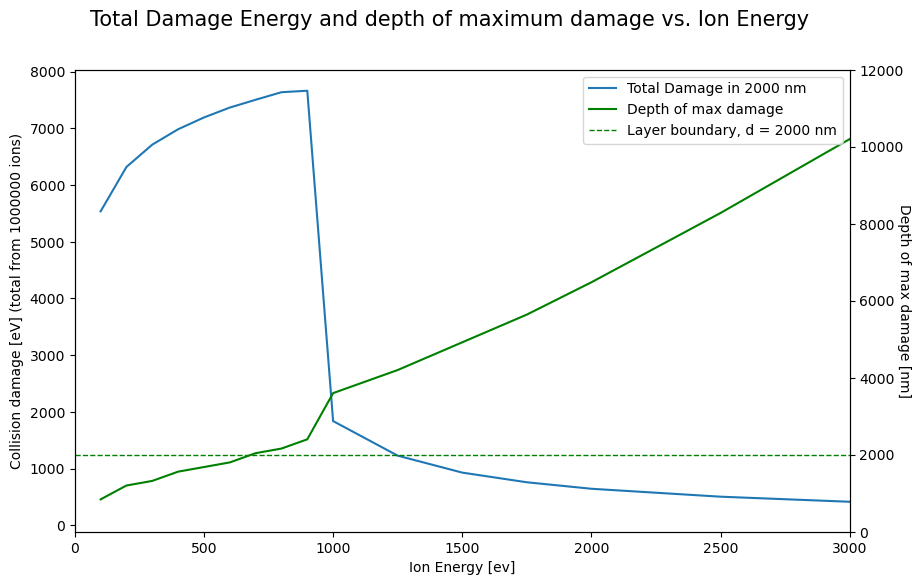

In [8]:
multi_srim_all.plot_max_and_total_dmg(depth_marker=2000, x_max = 3000, title=True)